#The Pavlov's Dog Experiment:

Pavlov was originally studying the digestive system in dogs, particularly their salivary reflex in response to food. During the experiments, he noticed that the dogs began to salivate not just when they were presented with food, but also when they saw the lab assistant who fed them, or even when they heard the sound of footsteps. This observation led Pavlov to explore how behaviors could be learned through association.
Key Elements:

    Unconditioned Stimulus (UCS): This is a stimulus that naturally and automatically triggers a response without any prior learning. In Pavlov’s experiment, food was the unconditioned stimulus because it naturally caused the dog to salivate.

    Unconditioned Response (UCR): This is the automatic, natural reaction to the unconditioned stimulus. In this case, salivation when food is presented is the unconditioned response.

    Neutral Stimulus (NS): This is a stimulus that initially does not trigger any significant response. In Pavlov’s experiment, the sound of a bell or tuning fork was used as the neutral stimulus.

    Conditioned Stimulus (CS): After the neutral stimulus is repeatedly paired with the unconditioned stimulus, it becomes a conditioned stimulus. The bell, after being paired with food several times, became a conditioned stimulus.

    Conditioned Response (CR): This is the learned response to the conditioned stimulus. After repeated pairing of the bell with the food, the dog began to salivate when hearing the bell alone, even when no food was presented.

Process of Classical Conditioning:

    Before Conditioning:
        Food (UCS) → Salivation (UCR) (Natural response)
        Bell (NS) → No Response (Neutral stimulus doesn’t cause salivation)

    During Conditioning:
        Pavlov rang the bell (NS) and then immediately presented the food (UCS). This process was repeated several times.

    After Conditioning:
        The bell (CS) alone triggered salivation (CR), even without food being presented. The dog had learned to associate the bell with food.

#Q-learning

Q-Learning is a model-free reinforcement learning algorithm used to find the optimal action-selection policy for a given environment. It is used in environments where an agent learns to maximize its cumulative reward by interacting with the environment over time. The agent learns a policy to decide which action to take in each state of the environment to achieve the highest reward.

#Key Concepts of Q-Learning:

    Agent: The learner or decision maker, which interacts with the environment.
    Environment: The space or system the agent interacts with. It provides feedback in the form of rewards and next states.
    State (s): A description of the current situation or environment in which the agent is.
    Action (a): The decision or move the agent takes in the current state to affect the environment.
    Reward (R): A scalar value that represents the feedback or outcome after taking an action in a particular state. It can be positive (for desirable outcomes) or negative (for undesirable ones).
    Policy (π): A strategy that defines the agent's actions in various states, aiming to maximize cumulative rewards.
    Value Function (V(s)): The expected long-term reward the agent will get starting from a particular state.
    Q-value or Action-Value (Q(s, a)): Represents the expected cumulative reward of taking an action a in state s and following the optimal policy thereafter. Q-values are used to determine the quality of an action taken from a given state.

#The Q-Learning Algorithm:

Q-Learning works by iteratively updating a Q-table (or Q-function) that stores Q-values for each state-action pair. The goal is to learn the optimal Q-values that maximize future rewards.
The Q-Learning Update Formula:

The core of Q-Learning is based on the following update rule:

Q(s,a)←Q(s,a)+α(R+γ⋅max⁡a′Q(s′,a′)−Q(s,a))


Where:

    Q(s,a): The current Q-value for the state-action pair (s,a).
    α: The learning rate (0 < α ≤ 1) controls how much of the new information overrides the old information. A higher value of αα means the agent learns faster.
    R: The immediate reward received after taking action a in state s.
    γ: The discount factor (0 ≤ γ ≤ 1) represents how much the agent values future rewards. A higher γγ means future rewards are given more weight.
    max⁡a′Q(s′,a′): The maximum Q-value for the next state s' across all possible actions. This represents the agent’s estimate of the best future reward from state s'.
    s′: The next state resulting from the action a in state s.
    ε: The exploration rate in reinforcement learning, determining the probability of taking a random action to explore versus exploiting the best-known action.
    n_episodes: The number of complete learning trials or interactions the agent performs with the environment to learn optimal behavior.

Import required libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Define the environment

0: No bell, no food

1: Bell, no food

2: Bell and food

3: No bell, food

Rewards: The dog receives a positive reward when it expects food after the bell (state 2)

In [ ]:
rewards = np.array([
    [0, 0, 0, 0],  # State 0 (No bell, no food)
    [0, 0, 10, 0], # State 1 (Bell, no food)
    [0, 0, 10, 0], # State 2 (Bell, food)
    [0, 0, 10, 0]  # State 3 (No bell, food)
])

Number of states and actions

In [ ]:
n_states = rewards.shape[0]
n_actions = rewards.shape[1]

Initialize the Q-table to zeros

In [ ]:
q_table = np.zeros((n_states, n_actions))

Hyperparameters for Q-learning

In [ ]:
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate
n_episodes = 1000  # Number of episodes

Track cumulative rewards

In [ ]:
cumulative_rewards = []

Q-learning algorithm

In [ ]:
for episode in range(n_episodes):
    # Start from state 0 (No bell, no food)
    state = 0
    done = False
    total_reward = 0

    while not done:
        # Choose action using epsilon-greedy strategy
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.choice(n_actions)  # Exploration: random action
        else:
            action = np.argmax(q_table[state])  # Exploitation: best action from Q-table

        # Simulate the environment: get next state and reward
        next_state = action  # In this simple case, action determines next state
        reward = rewards[state, action]
        total_reward += reward

        # Update Q-value using the Q-learning formula
        best_next_action = np.argmax(q_table[next_state])
        q_table[state, action] += alpha * (reward + gamma * q_table[next_state, best_next_action] - q_table[state, action])

        # Transition to next state
        state = next_state

        # Check if the episode is done (i.e., dog gets the food or no food after bell)
        if state == 2 or state == 3:  # If the dog gets food, episode ends
            done = True

    cumulative_rewards.append(total_reward)

Visualizing the learning process

1. Plot cumulative rewards to observe learning progression

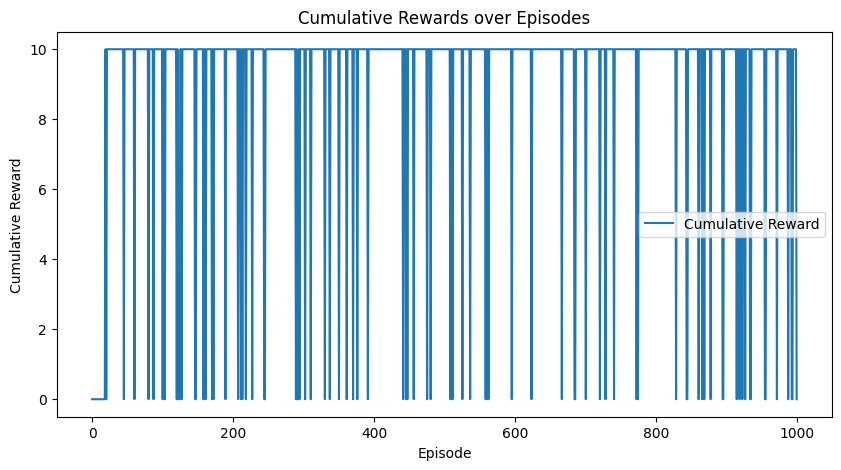

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(cumulative_rewards, label="Cumulative Reward")
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Rewards over Episodes")
plt.legend()
plt.show()

2. Visualize the Q-table

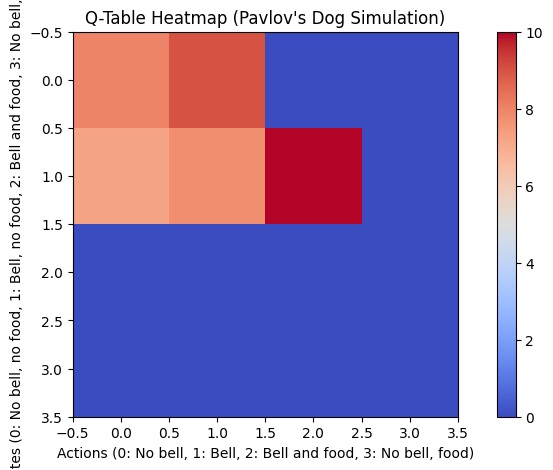

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(q_table, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title("Q-Table Heatmap (Pavlov's Dog Simulation)")
plt.xlabel("Actions (0: No bell, 1: Bell, 2: Bell and food, 3: No bell, food)")
plt.ylabel("States (0: No bell, no food, 1: Bell, no food, 2: Bell and food, 3: No bell, food)")
plt.show()

3. Print the Q-table for analysis

In [ ]:
print("Final Q-table after learning:")
print(q_table)

Final Q-table after learning:
[[ 7.97387901  9.          0.          0.        ]
 [ 7.2124448   7.76771619 10.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]


Explanation of metrics:

# - Cumulative Reward: Tracks the total reward received over episodes. It indicates how well the dog is learning to associate the bell with food.

# - Q-table: Stores the learned values for each state-action pair. Higher values indicate a stronger association between the bell (conditioned stimulus) and food.